<a href="https://colab.research.google.com/github/Kushal-Coder453/ATM/blob/main/project_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [7]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("escape_velocity.csv")
velocity=df["Velocity"].tolist()
escaped=df["Escaped"].tolist()
fig=px.scatter(x=velocity, y=escaped)
fig.show()

In [8]:
import numpy as np
velocityArray=np.array(velocity)
escapedArray=np.array(escaped)
m,c=np.polyfit(velocityArray, escapedArray, 1)
y=[]
for x in velocityArray:
  value=m*x+c
  y.append(value)
fig=px.scatter(x=velocityArray, y=escapedArray)
fig.update_layout(shapes=[dict(type='line', y0=min(y), y1=max(y), x0=min(velocityArray), x1=max(velocityArray))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



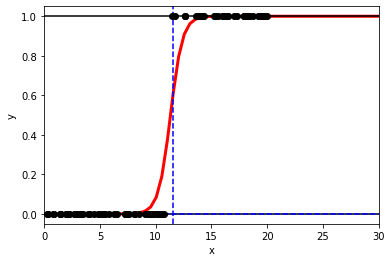

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(velocity, (len(velocity), 1))
Y=np.reshape(escaped, (len(escaped), 1))
lr=LogisticRegression()
lr.fit(X, Y)
plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)
def model(x):
  return 1/(1+np.exp(-x))
xtest=np.linspace(0, 100, 200)
escapingChances=model(xtest*lr.coef_+lr.intercept_).ravel()
plt.plot(xtest, escapingChances, color='red', lineWidth=3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0, color='b', linestyle='--')
plt.axvline(x=xtest[23], color='blue', linestyle='--')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(0, 30)
plt.show()